In [73]:
#  Import all the libraries needed in the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df=df.drop("Unnamed: 0",axis=1)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe(include="all")

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# since the price of radio can not be zero,so just replace it with median
df.loc[df['radio']==0]

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,8.8


In [8]:
df.loc[df["radio"]==0,"radio"]=df["radio"].median() 
# Replace the value with median

In [9]:
df.describe(include="all")

,TV,radio,newspaper,sales
count,200.000000,200.00000,200.000000,200.000000
mean,147.042500,23.37850,30.554000,14.022500
std,85.854236,14.75451,21.778621,5.217457
min,0.700000,0.30000,0.300000,1.600000
25%,74.375000,10.07500,12.750000,10.375000
50%,149.750000,23.10000,25.750000,12.900000
75%,218.825000,36.52500,45.100000,17.400000
max,296.400000,49.60000,114.000000,27.000000


In [10]:
# To check any duplicate rows present or not
len(df[df.duplicated()])

0

# Exploretary Data Analyysis

Text(0.5, 0, 'Sales')

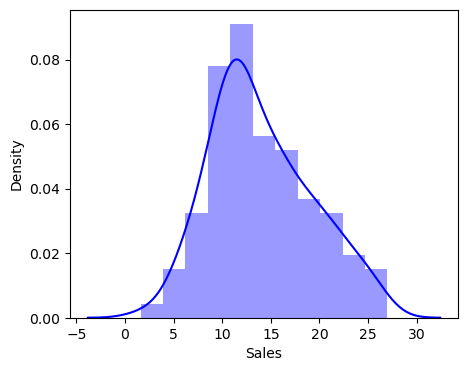

In [11]:
plt.figure(figsize=(5,4))
sns.distplot((df['sales']),color='blue')
plt.xlabel('Sales')
# The target variable is normally distributed

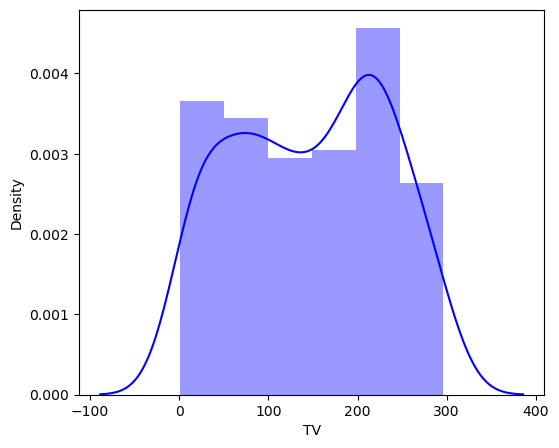

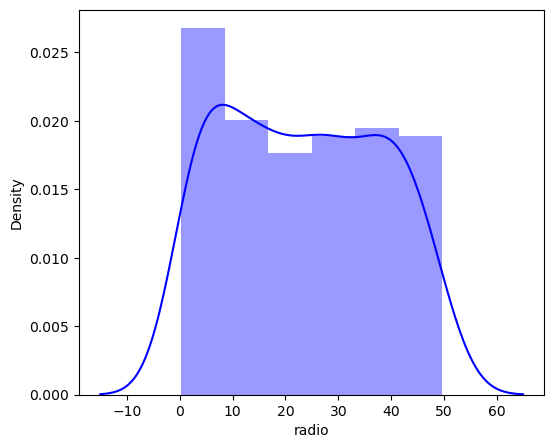

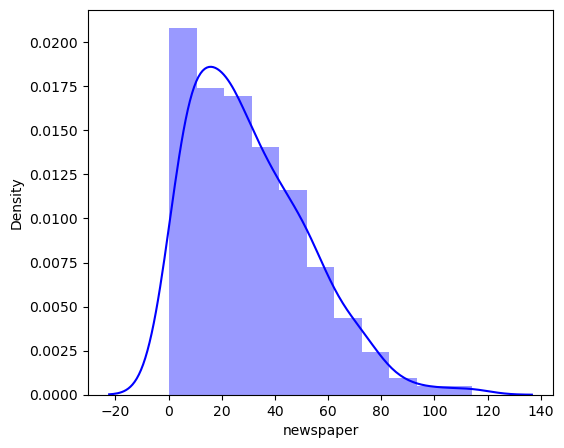

In [12]:
indep_var=["TV","radio","newspaper"]
for col in indep_var:
    fig = plt.figure(figsize=(6,5))
    feature = df[col]
    sns.distplot(feature,color='blue')

From above it's clear that our independent variable is right as well as left skewed for some columns.

=> Now we will normalize Independent columns using sqrt transform

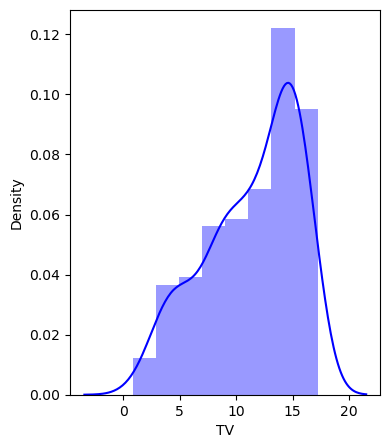

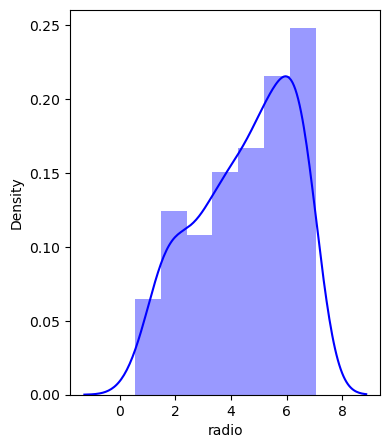

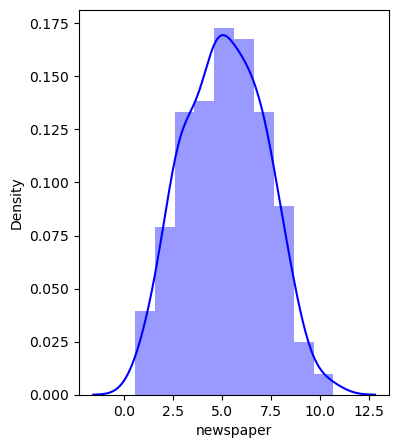

In [56]:
for col in indep_var:
    fig=plt.figure(figsize=(4,5))
    feature=np.sqrt(df[col])
    sns.distplot(feature,color="blue")

Now we will try to get the relationship between dependent and independent variable

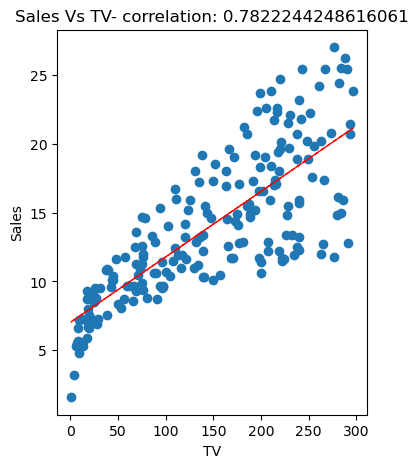

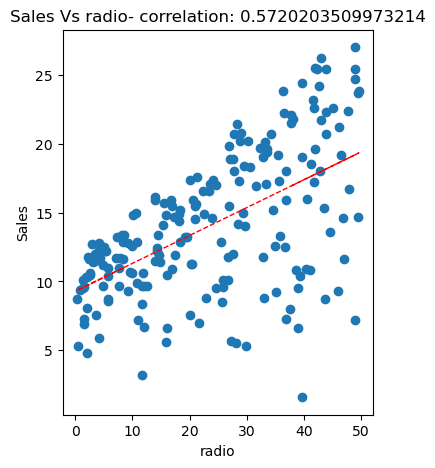

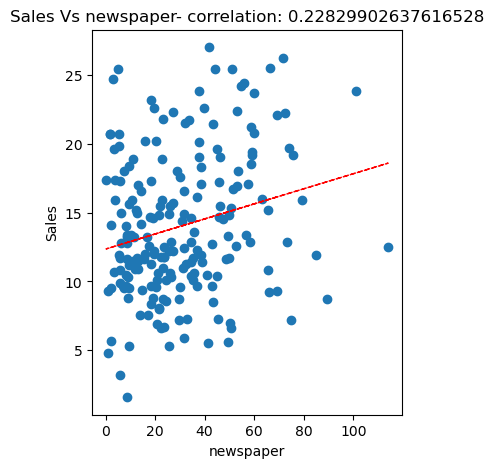

In [14]:
for col in indep_var:
    fig=plt.figure(figsize=(4,5))
    feature=df[col]
    target=df["sales"]
    correlation = feature.corr(target)
    
    plt.scatter(x=feature,y=target)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title('Sales'+ ' Vs ' + col + '- correlation: ' + str(correlation))
    z=np.polyfit(df[col], df['sales'],1)
    y_hat=np.poly1d(z)(df[col])
 
    plt.plot(df[col], y_hat, "r--", lw=1)

From the above graph it is s

<AxesSubplot:>

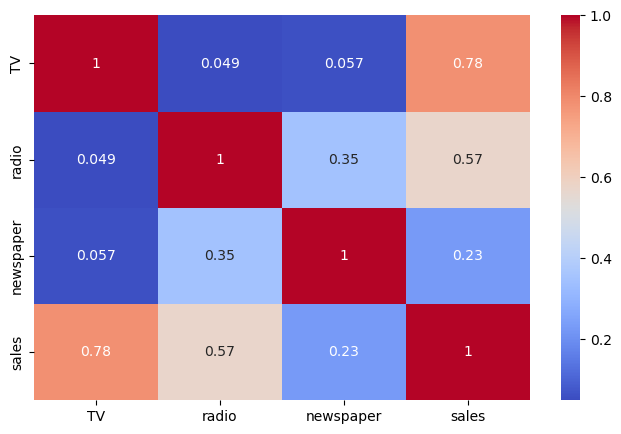

In [15]:
# Correlation HeatMap Plot 
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From the above HeatMap it seems that TV is highly collerated with the sales also newspaper is showing avearge relation with sales so we can keep that variable for our Model.

In [16]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [21]:
calc_vif(df[[i for i in df.describe().columns if i not in ["sales"]]])

,variables,VIF
0,TV,2.491374
1,radio,3.286434
2,newspaper,3.049281


 Since the VIF is less than 5,Multicollinearity is not exist and hence we can consider these 3 independent variable in our Model Building

# Implementing Linear Regression Model

In [26]:
X=df.drop(columns=["sales"])
y=df["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print("The R2 training score is :",lr.score(X_train, y_train))

The R2 training score is : 0.9068082162982136


In [83]:
lr.coef_

array([ 0.04482655,  0.19761321, -0.00184007])

In [39]:
y_pred = lr.predict(X_test)


Regression Evaluation Metrics

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE=mean_absolute_error(y_test,y_pred)
print("MAE :", MAE)

MSE=mean_squared_error((y_test),(y_pred))
print("MSE :",MSE )

RMSE=np.sqrt(MSE)
print("RMSE :", RMSE)

R2_score=r2_score(y_test,y_pred)
print("R2 Score :",R2_score)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adj_R2 :",adj_r2)

MAE : 1.3728563377537384
MSE : 4.396323380784594
RMSE : 2.0967411334698887
R2 Score : 0.8602986625467571
Adj_R2 : 0.8486568844256536


The Adj. R-squared is 0.84. This means that approximately 84% of the total variation in the data can be explained by the model.

# Implimenting OLS Method

In [58]:
import statsmodels.api as sm

X = sm.add_constant(X) #let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     571.0
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.41e-96
Time:                        23:15:56   Log-Likelihood:                -386.07
No. Observations:                 200   AIC:                             780.1
Df Residuals:                     196   BIC:                             793.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8498      0.313      9.092      0.000       2.232       3.468
TV             0.0459      0.001     32.962      0.000       0.043       0.049
radio          0.1893      0.009     21.911      0.000       0.172       0.206
newspaper     -0.0003      0.006     -0.048      0.962      -0.012       0.011
==============================================================================
Omnibus:                       58.801   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.583
Skew:                          -1.302   Prob(JB):                     6.63e-32
Kurtosis:                       6.233   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since P>|t| for newspaper is greater than 0.05, Hence we can ignore this column

# Implementing Lasso regression

Now we will try to Regularize our Normal Linear Regression  model by using Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [76]:
lasso.score(X_train, y_train)

0.9068082071424421

In [82]:
lasso.coef_

array([ 0.04482554,  0.19758302, -0.00182219])

In [79]:
y_pred_l = lasso.predict(X_test)

In [80]:
MAE=mean_absolute_error(y_test, y_pred_l)
print("MAE :" ,MAE)

MSE  = mean_squared_error(y_test, y_pred_l)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_l)
print("R2 :" ,r2)

Adj_r2=1-(1-r2_score(y_test, y_pred_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

MAE : 1.3728613349028258
MSE : 4.39594704827445
RMSE : 2.0966513893049674
R2 : 0.86031062121095
Adjusted R2 :  0.8486698396451959


There is not much variation observed as the size of coefficent of linear regression is already small. So the penalty term has not much impact on object function.